In [2]:
from RegistrationObj import RegistrationObj
from utils import pcd_to_tif , visualise_pcd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# Specifying file paths (sox2)

In [3]:
""" Mapping to test sample"""
target_test = "./datasets/2-permutation/xyz_target.xls"
source_test = "./datasets/2-permutation/xyz_source.xls"
target_color_test = "./datasets/2-permutation/sox2_target.xls"
source_color_test = "./datasets/2-permutation/sox2_source.xls"

# Performing registration 

In [4]:
test_obj = RegistrationObj(source_test, target_test, source_color_test, target_color_test, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])
test_results = test_obj.perform_registration(verbose = False)

In [5]:
target_new, mapped_rgb , registered_color = test_obj.map_source2target_null()
target_old, mapped_rgb_old , registered_color_old = test_obj.map_source2target()

Using median averaging
Using median averaging


In [6]:
target_down = target_new.voxel_down_sample(voxel_size = 1)

In [7]:
target_down_pcd = np.asarray(target_down.points)
target_down_colors = np.asarray(target_down.colors)
target_down_pcd.shape

(2878, 3)

<IPython.core.display.Javascript object>


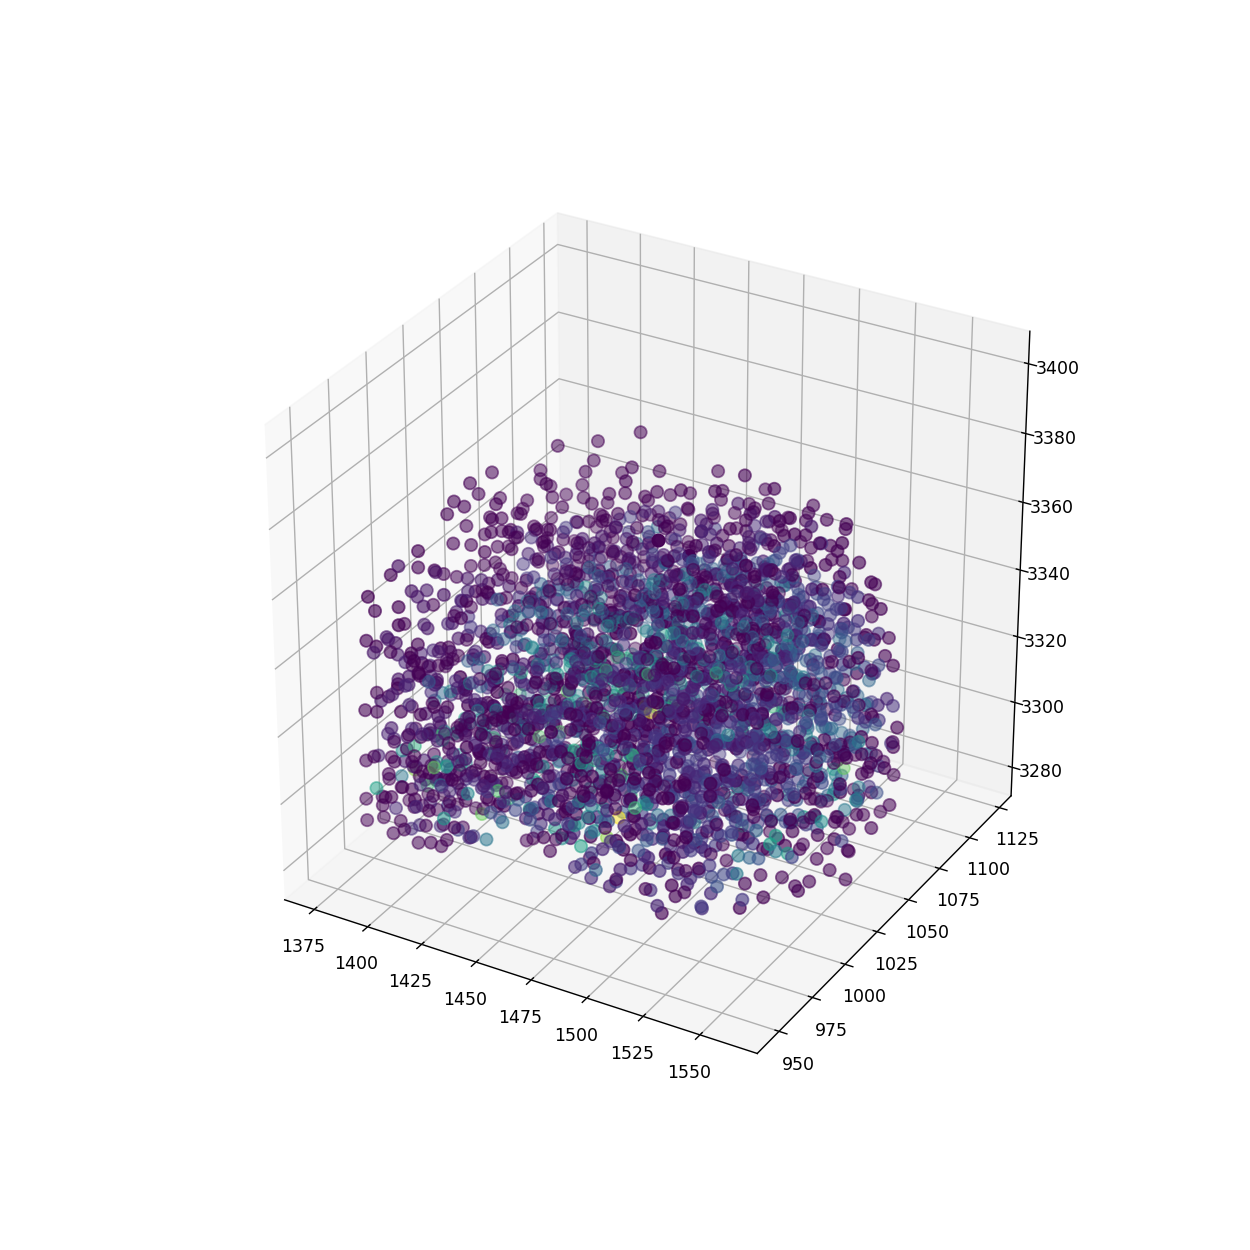

In [8]:
visualise_pcd(target_down)

# Exporting Image

In [9]:
pcd_to_tif(target_new, registered_color, 1024, 1024, 120, filename = "sox2_null.tif")

Saving color channel as sox2_null.tif
Saving DAPI channel as DAPI_sox2_null.tif


In [11]:
registered_color

array([[ 0.    ],
       [36.2791],
       [ 0.    ],
       ...,
       [ 0.    ],
       [ 0.    ],
       [ 0.    ]])